<h1><b>P10<b></h1>

Program 1: Program Simulasi Sistem Dinamik Tangki dengan Outlet Tertutup

<ipython-input-17-4d154bbe45b0>:35: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i + 1] = Level0  # Menyimpan level air yang dihitung untuk plotting nanti


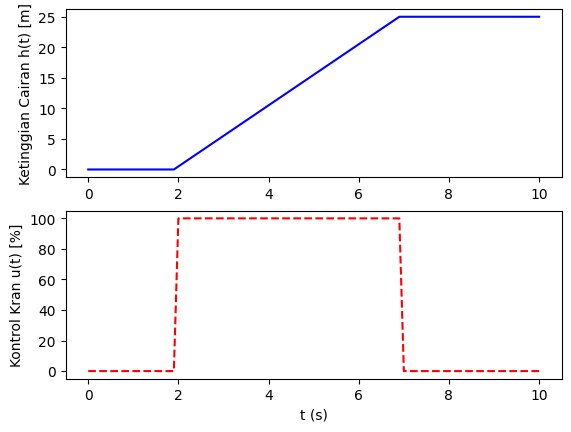

In [ ]:
import numpy as np  # Mengimpor library numpy untuk operasi matematika dan array
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi grafik
from scipy.integrate import odeint  # Mengimpor odeint dari scipy untuk menyelesaikan persamaan diferensial

# Nonaktifkan penggunaan LaTeX
plt.rcParams['text.usetex'] = False  # Menonaktifkan penggunaan LaTeX dalam plot

# Mendefinisikan model tangki dengan fungsi 'tank'
def tank(Level, time, c, valve):
    rho = 1000.0  # Densitas air (kg/m^3)
    A = 1.0      # Luas area tangki (m^2)
    # Menghitung turunan perubahan level air di dalam tangki
    dLevel_dt = (c / (rho * A)) * valve  # Derivatif level berdasarkan koefisien katup dan aliran
    return dLevel_dt  # Mengembalikan perubahan level air

# Membuat array waktu untuk simulasi (dari 0 hingga 10 detik, dengan interval 0.1 detik)
ts = np.linspace(0, 10, 101)  # 101 titik data dalam rentang 0 hingga 10 detik

# Definisi operasi katup
c = 50.0  # Koefisien katup (kg/s / % terbuka)
u = np.zeros(101)  # Membuat array u untuk persentase pembukaan katup, diinisialisasi dengan nol
u[20:70] = 100.0  # Menetapkan katup terbuka 100% antara detik ke-2 dan ke-7

# Kondisi awal level air di dalam tangki
Level0 = 0  # Level awal tangki pada waktu t=0 adalah 0 meter

# Array untuk menyimpan hasil simulasi level air
z = np.zeros(101)  # Inisialisasi array untuk menyimpan hasil level air sepanjang waktu

# Simulasi dengan odeint untuk menyelesaikan persamaan diferensial
for i in range(100):  # Melakukan iterasi untuk setiap waktu yang diinginkan
    valve = u[i + 1]  # Menentukan status katup pada waktu tertentu (dari array u)
    y = odeint(tank, Level0, [0, 0.1], args=(c, valve))  # Menyelesaikan persamaan diferensial dengan odeint
    Level0 = y[-1]  # Mengambil nilai level terakhir dari hasil odeint untuk digunakan pada iterasi berikutnya
    z[i + 1] = Level0  # Menyimpan level air yang dihitung untuk plotting nanti

# Membuat plot hasil simulasi
plt.figure()  # Membuat sebuah figur baru untuk plot
plt.subplot(2, 1, 1)  # Membuat subplot pertama (grafik di atas)
plt.plot(ts, z, 'b-')  # Menggambar grafik level air terhadap waktu (warna biru)
plt.ylabel('Ketinggian Cairan h(t) [m]')  # Label sumbu y dengan teks biasa untuk ketinggian cairan

plt.subplot(2, 1, 2)  # Membuat subplot kedua (grafik di bawah)
plt.plot(ts, u, 'r--')  # Menggambar grafik pembukaan katup terhadap waktu (garis putus-putus merah)
plt.ylabel('Kontrol Kran u(t) [%]')  # Label sumbu y dengan teks biasa untuk kontrol katup
plt.xlabel('t (s)')  # Label sumbu x dengan simbol waktu dalam satuan detik
plt.show()  # Menampilkan plot

<ipython-input-12-8a0b1012a6d5>:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  z[i + 1] = Level0  # Menyimpan level air yang dihitung untuk plotting nanti


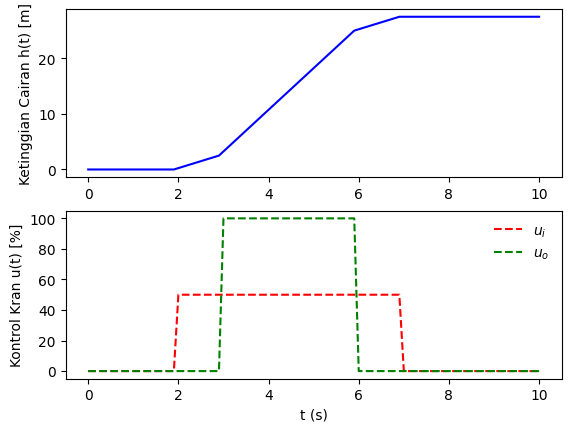

In [ ]:
import numpy as np  # Mengimpor library numpy untuk operasi matematika dan array
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi grafik
from scipy.integrate import odeint  # Mengimpor odeint dari scipy untuk menyelesaikan persamaan diferensial

# Nonaktifkan penggunaan LaTeX
plt.rcParams['text.usetex'] = False  # Menonaktifkan penggunaan LaTeX dalam plot

# Mendefinisikan model tangki dengan fungsi 'tank'
def tank(Level, time, c, valve1, valve2):
    rho = 1000.0  # Densitas air (kg/m^3)
    A = 1.0      # Luas area tangki (m^2)
    # Menghitung turunan perubahan level air di dalam tangki
    dLevel_dt = (c / (rho * A)) * (valve1 + valve2)  # Derivatif level berdasarkan koefisien katup dan aliran
    return dLevel_dt  # Mengembalikan perubahan level air

# Membuat array waktu untuk simulasi (dari 0 hingga 10 detik, dengan interval 0.1 detik)
ts = np.linspace(0, 10, 101)  # 101 titik data dalam rentang 0 hingga 10 detik

# Definisi operasi katup
c = 50.0  # Koefisien katup (kg/s / % terbuka)
ui = np.zeros(101)  # Membuat array ui untuk persentase pembukaan katup pertama, diinisialisasi dengan nol
ui[20:70] = 50.0  # Menetapkan katup pertama terbuka 50% antara detik ke-2 dan ke-7

uo = np.zeros(101)  # Membuat array uo untuk persentase pembukaan katup kedua, diinisialisasi dengan nol
uo[30:60] = 100.0  # Menetapkan katup kedua terbuka 100% antara detik ke-3 dan ke-6

# Kondisi awal level air di dalam tangki
Level0 = 0  # Level awal tangki pada waktu t=0 adalah 0 meter

# Array untuk menyimpan hasil simulasi level air
z = np.zeros(101)  # Inisialisasi array untuk menyimpan hasil level air sepanjang waktu

# Simulasi dengan odeint untuk menyelesaikan persamaan diferensial
for i in range(100):  # Melakukan iterasi untuk setiap waktu yang diinginkan
    valve1 = ui[i + 1]  # Menentukan status katup pertama pada waktu tertentu (dari array ui)
    valve2 = uo[i + 1]  # Menentukan status katup kedua pada waktu tertentu (dari array uo)
    y = odeint(tank, Level0, [0, 0.1], args=(c, valve1, valve2))  # Menyelesaikan persamaan diferensial dengan odeint
    Level0 = y[-1]  # Mengambil nilai level terakhir dari hasil odeint untuk digunakan pada iterasi berikutnya
    z[i + 1] = Level0  # Menyimpan level air yang dihitung untuk plotting nanti

# Membuat plot hasil simulasi
plt.figure()  # Membuat sebuah figur baru untuk plot
plt.subplot(2, 1, 1)  # Membuat subplot pertama (grafik di atas)
plt.plot(ts, z, 'b-')  # Menggambar grafik level air terhadap waktu (warna biru)
plt.ylabel('Ketinggian Cairan h(t) [m]')  # Label sumbu y dengan teks biasa untuk ketinggian cairan

plt.subplot(2, 1, 2)  # Membuat subplot kedua (grafik di bawah)
plt.plot(ts, ui, 'r--')  # Menggambar grafik pembukaan katup pertama terhadap waktu (garis putus-putus merah)
plt.plot(ts, uo, 'g--')  # Menggambar grafik pembukaan katup kedua terhadap waktu (garis putus-putus hijau)
plt.ylabel('Kontrol Kran u(t) [%]')  # Label sumbu y dengan teks biasa untuk kontrol katup
plt.xlabel('t (s)')  # Label sumbu x dengan simbol waktu dalam satuan detik
plt.legend([r'$u_i$', r'$u_o$'], frameon=False)  # Menambahkan legenda untuk katup pertama dan kedua
plt.show()  # Menampilkan plot

<h1><b>P11<b></h1>

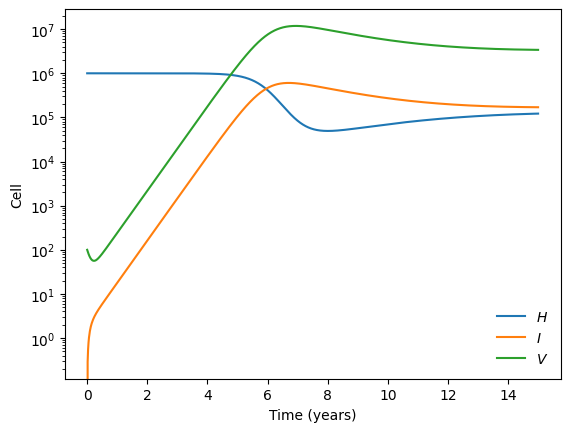

In [ ]:
import numpy as np  # Mengimpor library numpy untuk operasi matematika dan array
from scipy.integrate import odeint  # Mengimpor odeint dari scipy untuk menyelesaikan persamaan diferensial
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi grafik

# Menonaktifkan penggunaan LaTeX dalam plot
plt.rcParams['text.usetex'] = False

# Parameter model HIV
kr1 = 1e5  # Produksi sel sehat per tahun
kr2 = 0.1  # Tingkat kematian sel sehat
kr3 = 2e-7  # Sel sehat yang berubah menjadi sel terinfeksi
kr4 = 0.5  # Tingkat kematian sel terinfeksi
kr5 = 5  # Tingkat kematian virus
kr6 = 100  # Produksi virus oleh sel terinfeksi

# Fungsi yang mendefinisikan model persamaan diferensial HIV
def HIV(x, t):
    h = x[0]  # Jumlah sel sehat
    i = x[1]  # Jumlah sel terinfeksi
    v = x[2]  # Jumlah virus
    dhdt = kr1 - kr2 * h - kr3 * h * v  # Persamaan untuk perubahan jumlah sel sehat
    didt = kr3 * h * v - kr4 * i  # Persamaan untuk perubahan jumlah sel terinfeksi
    dvdt = -kr3 * h * v - kr5 * v + kr6 * i  # Persamaan untuk perubahan jumlah virus
    return [dhdt, didt, dvdt]  # Mengembalikan perubahan untuk ketiga variabel

# Kondisi awal (jumlah sel sehat, terinfeksi, dan virus)
x0 = [1e6, 0, 100]  # Jumlah sel sehat = 1 juta, sel terinfeksi = 0, virus = 100
t = np.linspace(0, 15, 1000)  # Rentang waktu dari 0 hingga 15 tahun, dengan 1000 titik data

# Menyelesaikan persamaan diferensial dengan odeint
x = odeint(HIV, x0, t)  # Solusi numerik untuk sistem persamaan diferensial

# Membuat plot hasil simulasi
plt.semilogy(t, x[:, 0], label='$H$')  # Plot untuk jumlah sel sehat
plt.semilogy(t, x[:, 1], label='$I$')  # Plot untuk jumlah sel terinfeksi
plt.semilogy(t, x[:, 2], label='$V$')  # Plot untuk jumlah virus

# Menambahkan label dan legenda
plt.xlabel('Time (years)')  # Label untuk sumbu x dengan waktu dalam tahun
plt.ylabel('Cell')  # Label untuk sumbu y dengan jumlah sel
plt.legend(frameon=False)  # Menampilkan legenda tanpa bingkai
plt.show()  # Menampilkan plot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 73.7 MB/s eta 0:00:00


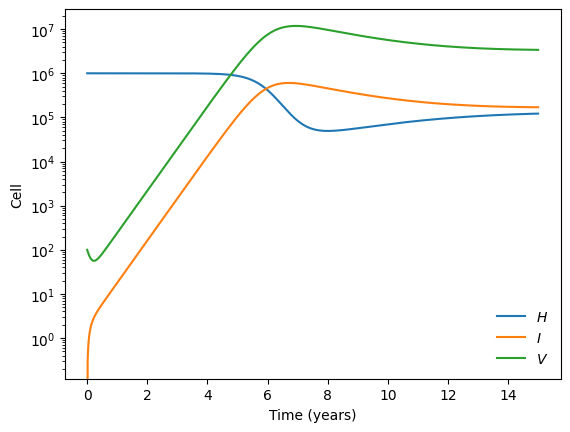

In [ ]:
!pip install gekko


import numpy as np  # Mengimpor library numpy untuk operasi matematika dan array
from gekko import GEKKO  # Mengimpor GEKKO untuk pemodelan optimasi dan persamaan diferensial
import matplotlib.pyplot as plt  # Mengimpor matplotlib untuk visualisasi grafik

# Menonaktifkan penggunaan LaTeX dalam plot (optional)
plt.rcParams['text.usetex'] = False

# Parameter model HIV
kr1 = 1e5  # Produksi sel sehat per tahun
kr2 = 0.1  # Tingkat kematian sel sehat
kr3 = 2e-7  # Sel sehat yang berubah menjadi sel terinfeksi
kr4 = 0.5  # Tingkat kematian sel terinfeksi
kr5 = 5  # Tingkat kematian virus
kr6 = 100  # Produksi virus oleh sel terinfeksi

# Membuat objek GEKKO
m = GEKKO()

# Mendefinisikan variabel model untuk sel sehat (h), sel terinfeksi (i), dan virus (v)
h, i, v = m.Array(m.Var, 3)

# Menginisialisasi nilai awal
h.value = 1e6  # Jumlah sel sehat = 1 juta
i.value = 0    # Jumlah sel terinfeksi = 0
v.value = 100  # Jumlah virus = 100

# Menyusun persamaan diferensial untuk perubahan jumlah sel sehat, terinfeksi, dan virus
m.Equations([
    h.dt() == kr1 - kr2 * h - kr3 * h * v,  # Persamaan untuk perubahan jumlah sel sehat
    i.dt() == kr3 * h * v - kr4 * i,        # Persamaan untuk perubahan jumlah sel terinfeksi
    v.dt() == -kr3 * h * v - kr5 * v + kr6 * i  # Persamaan untuk perubahan jumlah virus
])

# Rentang waktu simulasi (0 hingga 15 tahun, dengan 1000 titik data)
t = np.linspace(0, 15, 1000)
m.time = t  # Menyimpan waktu ke dalam model GEKKO

# Mengatur mode simulasi
m.options.IMODE = 7  # Mode simulasi untuk penyelesaian diferensial
m.options.NODES = 3  # Jumlah titik untuk integrasi numerik

# Menyelesaikan model
m.solve(disp=False)  # Menyelesaikan model tanpa menampilkan output

# Plot hasil simulasi
plt.semilogy(m.time, h.value, label=r'$H$')  # Plot untuk jumlah sel sehat
plt.semilogy(m.time, i.value, label=r'$I$')  # Plot untuk jumlah sel terinfeksi
plt.semilogy(m.time, v.value, label=r'$V$')  # Plot untuk jumlah virus

# Menambahkan label dan legenda
plt.xlabel(r'Time (years)')  # Label untuk sumbu x dengan waktu dalam tahun
plt.ylabel(r'Cell')  # Label untuk sumbu y dengan jumlah sel
plt.legend(frameon=False)  # Menampilkan legenda tanpa bingkai
plt.show()  # Menampilkan plot